<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#With-Bumps" data-toc-modified-id="With-Bumps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>With Bumps</a></span><ul class="toc-item"><li><span><a href="#Stop-and-cost" data-toc-modified-id="Stop-and-cost-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stop and cost</a></span></li><li><span><a href="#ri" data-toc-modified-id="ri-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ri</a></span></li><li><span><a href="#Balance" data-toc-modified-id="Balance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Balance</a></span></li><li><span><a href="#edge-attrs" data-toc-modified-id="edge-attrs-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>edge attrs</a></span></li></ul></li><li><span><a href="#No-Bumps" data-toc-modified-id="No-Bumps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>No Bumps</a></span><ul class="toc-item"><li><span><a href="#Stop-and-cost" data-toc-modified-id="Stop-and-cost-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Stop and cost</a></span></li><li><span><a href="#ri" data-toc-modified-id="ri-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ri</a></span></li><li><span><a href="#Balance" data-toc-modified-id="Balance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Balance</a></span></li><li><span><a href="#Edge-Attributes" data-toc-modified-id="Edge-Attributes-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Edge Attributes</a></span></li></ul></li><li><span><a href="#Compare-balances" data-toc-modified-id="Compare-balances-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare balances</a></span><ul class="toc-item"><li><span><a href="#Using-balance-vector" data-toc-modified-id="Using-balance-vector-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using balance vector</a></span></li><li><span><a href="#Using-balance-list" data-toc-modified-id="Using-balance-list-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using balance list</a></span></li><li><span><a href="#Using-second-to-last-item-in-balance-list" data-toc-modified-id="Using-second-to-last-item-in-balance-list-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Using second to last item in balance list</a></span></li></ul></li><li><span><a href="#Compare-ris" data-toc-modified-id="Compare-ris-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare ris</a></span><ul class="toc-item"><li><span><a href="#As-a-function-of-different-update-factors" data-toc-modified-id="As-a-function-of-different-update-factors-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>As a function of different update factors</a></span></li></ul></li><li><span><a href="#Compare-balance-as-a-function-of-different-update-factors" data-toc-modified-id="Compare-balance-as-a-function-of-different-update-factors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare balance as a function of different update factors</a></span><ul class="toc-item"><li><span><a href="#Using-the-second-to-last-entry" data-toc-modified-id="Using-the-second-to-last-entry-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Using the second to last entry</a></span></li><li><span><a href="#Why-does-the-uf-=-1.5-not-reach-a-small-value-of-balance-(but-still-not-ridiculous)" data-toc-modified-id="Why-does-the-uf-=-1.5-not-reach-a-small-value-of-balance-(but-still-not-ridiculous)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Why does the uf = 1.5 not reach a small value of balance (but still not ridiculous)</a></span></li></ul></li></ul></div>

I realized that all the fancy stuff I implemented (fu etc) did not work even with 2 nodes. 
I need to understand why before scaling it up. 

We can run the same experiments as before on 2 nodes but it will be easier to understand what is truly going on. 

# Conclusion

The conclusion of this notebook: 
1. I think we understand now why the problem is solve exactly always for the same iterates in very simple instances of the problem. 
2. Once the ri are stabilized, you will perform very well on the given instances of the problem at the same iteration. 
3. We do not really know what causes in some cases the ri to oscillate, and why the solutions with the update factor cause it to oscillate. 
4. The update factor is not necessarily beneficial. Maybe it prevents from exploring some areas of the landscape. Maybe it is a hyperparameter to tune... I don't know yet. 


What are the next steps: 
1. Try to understand what is the link between ri not stabilized (i.e. oscillating) and the update factors
2. Try to see whether you can find a good value of the update factor on a larger number of nodes. 
3. Try to see if you cannot leverage a similar mechanism of periodicity to lower the balance in the outer iterations.
4. Try to understand whether there is a “fundamental limit” to the balance you can achieve. 

# Load

In [368]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

import amod_ed

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_stop_and_cost, plot_ri_list, plot_balance_list

from amod_ed.result_analysis import plot_edge_attrs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# With Bumps

Here we run experiments without fixed update. 
Always, the FW_tol is 0 so we go to every inner iteration max number

In [369]:
n_nodes=2
subfolder='bumps'

DATA_PATH = '/Users/lucasfuentes/ASL/ICU/notebooks/Data/'

path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/',subfolder)

In [370]:
print(os.listdir(path))

['output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl']


In [371]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl


In [372]:
ri1=ri_FW

In [373]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

In [374]:
print_final_flows(G_FW[-1])

('0', '1')  :  9.275056281044291
('0', 'R')  :  6.494304099094499
('0', '1_p')  :  2.780752181949789
('0', '0_p')  :  0.7249437189556943
('1', '0')  :  9.27505628104429
('1', 'R')  :  0.0
('1', '0_p')  :  9.275056281044291
('1', '1_p')  :  7.219247818050208


## Stop and cost

What do I see? 
- We get to solve the problem close to optimally
- Relative progress always decreases to very small values


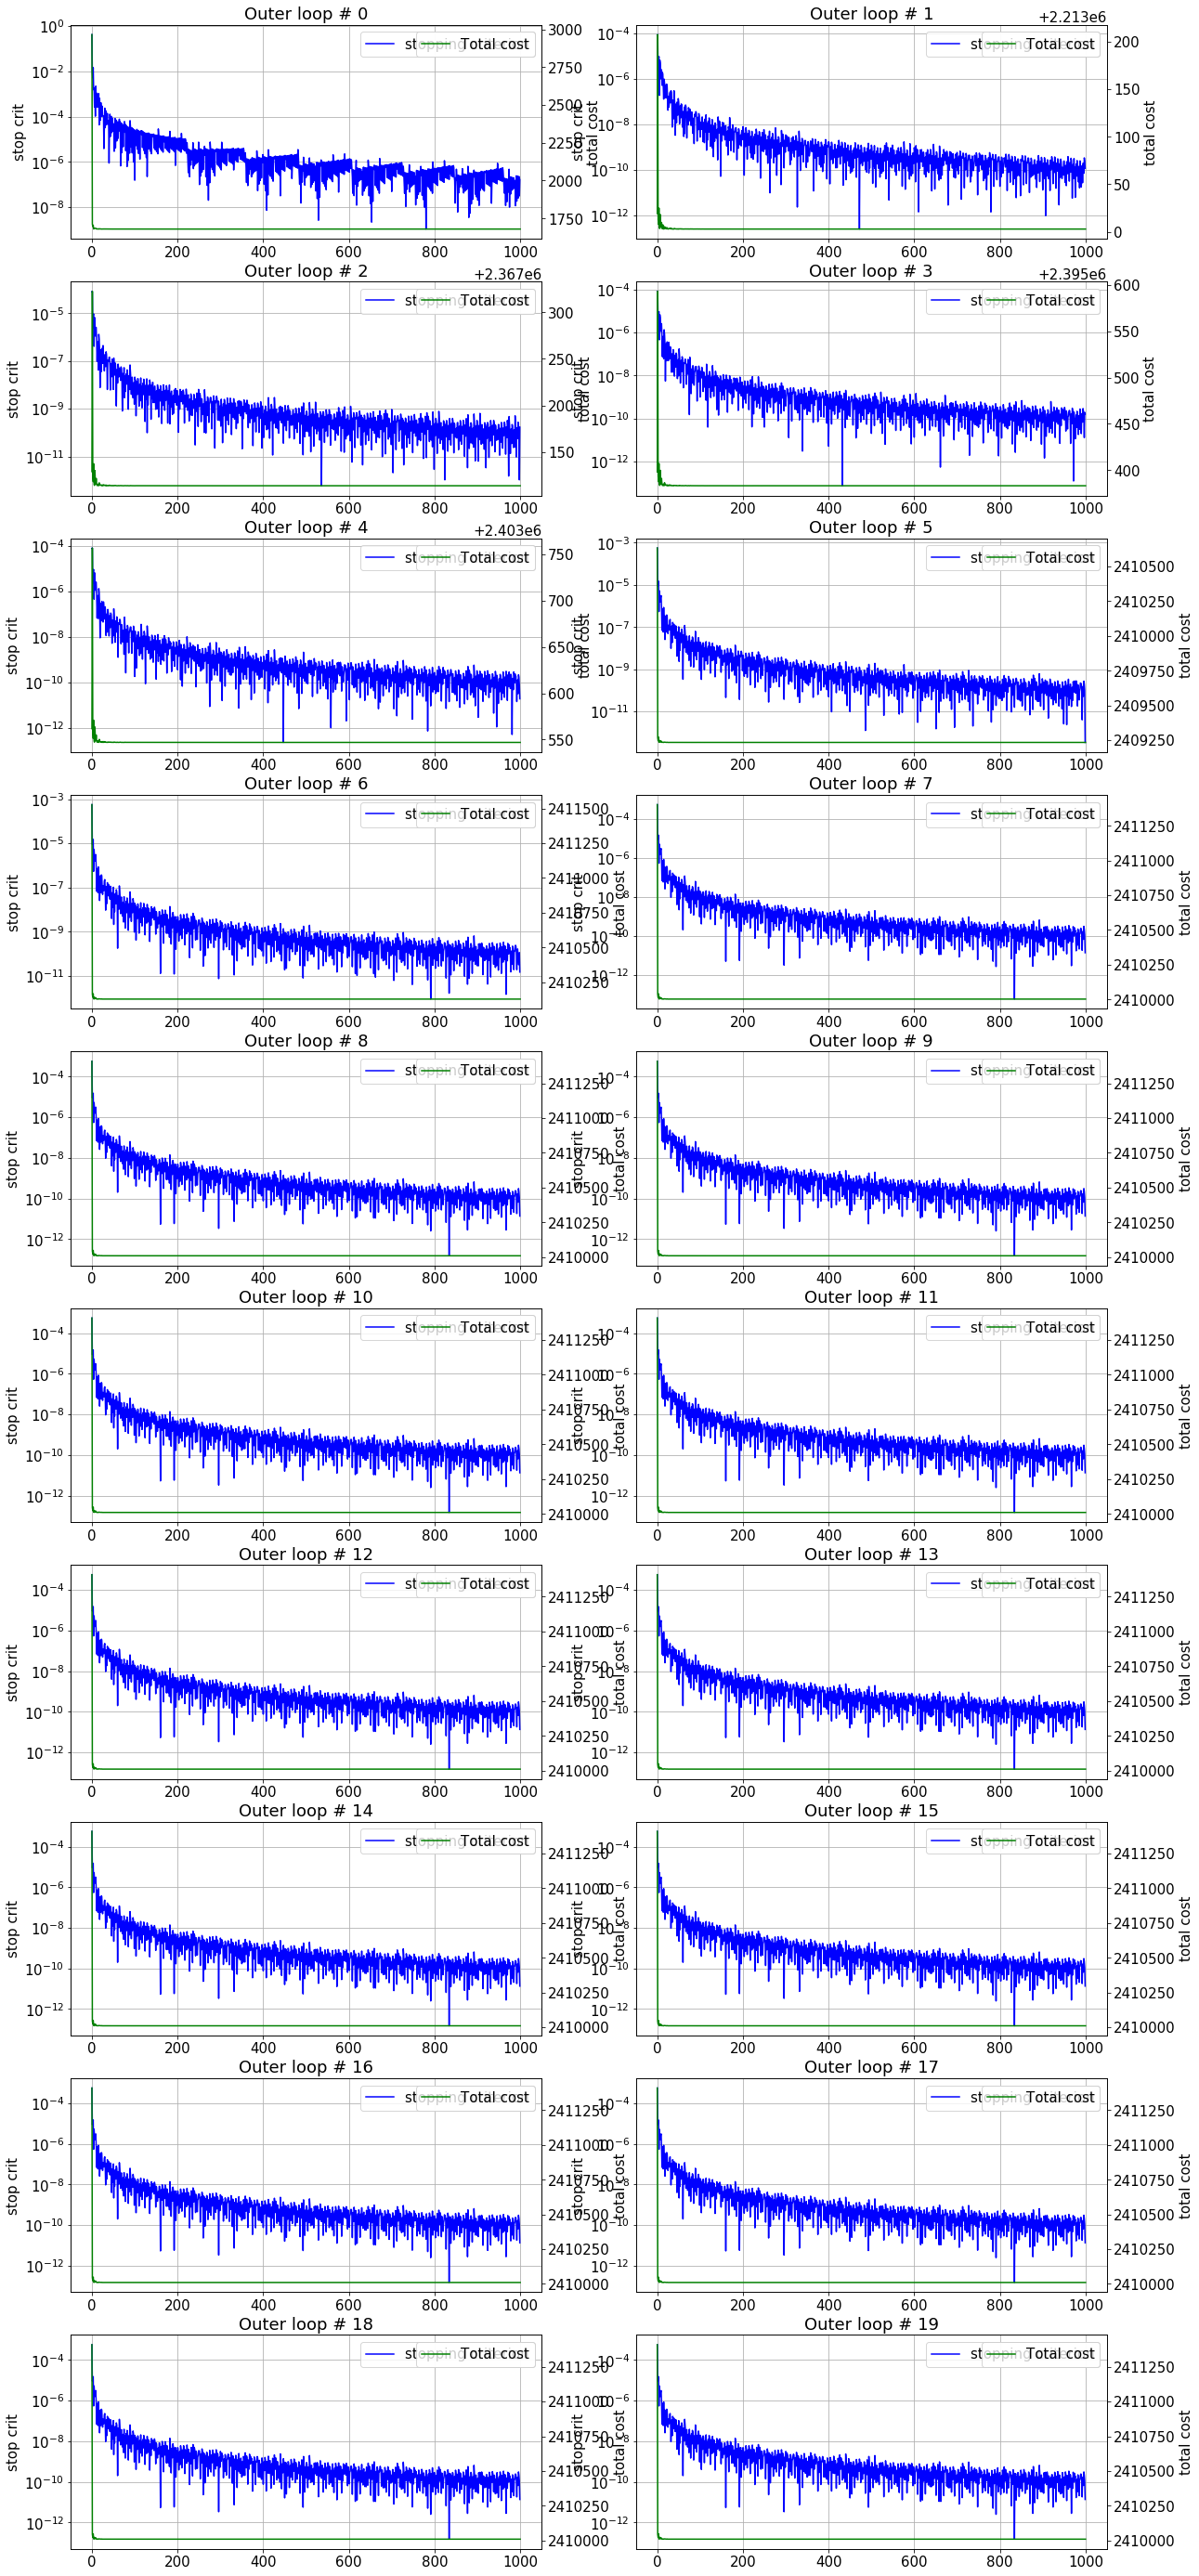

In [375]:
plot_stop_and_cost(opt_res)

## ri

What do I see? 
- ri values stabilized after a few iterations. 

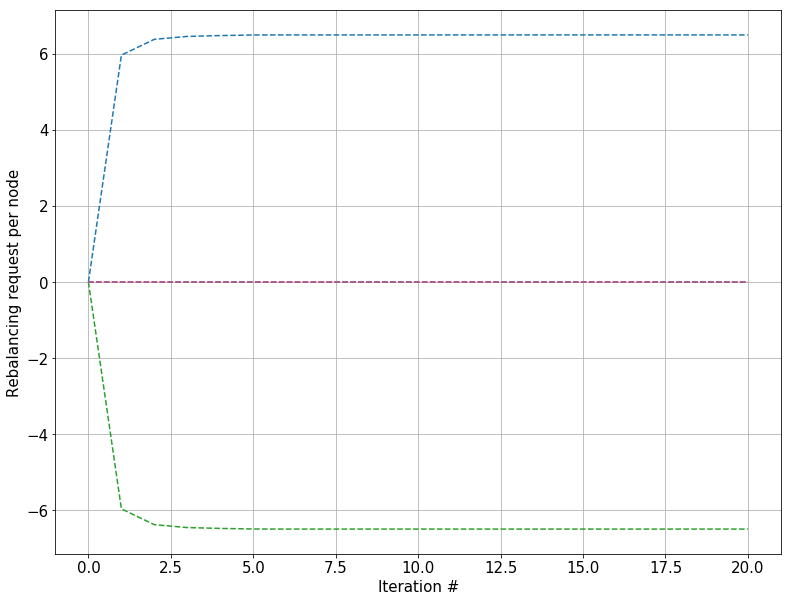

In [376]:
plot_ri_list(ri_FW, save=False, path=None)

## Balance

What do I see? 
- Balance decreases to small values
- But oscillates within an iteration (as we would expect)

Also, balance drops at the last iterate of iterations when the ri are stabilized. This is very consistent with previous observations. 

/Users/lucasfuentes/ASL/ICU/amod_ed/result_analysis.py:309: RuntimeWarning: divide by zero encountered in double_scalars
  r_p.append(np.abs(balance_list[n][k]-balance_list[n][k+1])/balance_list[n][k])


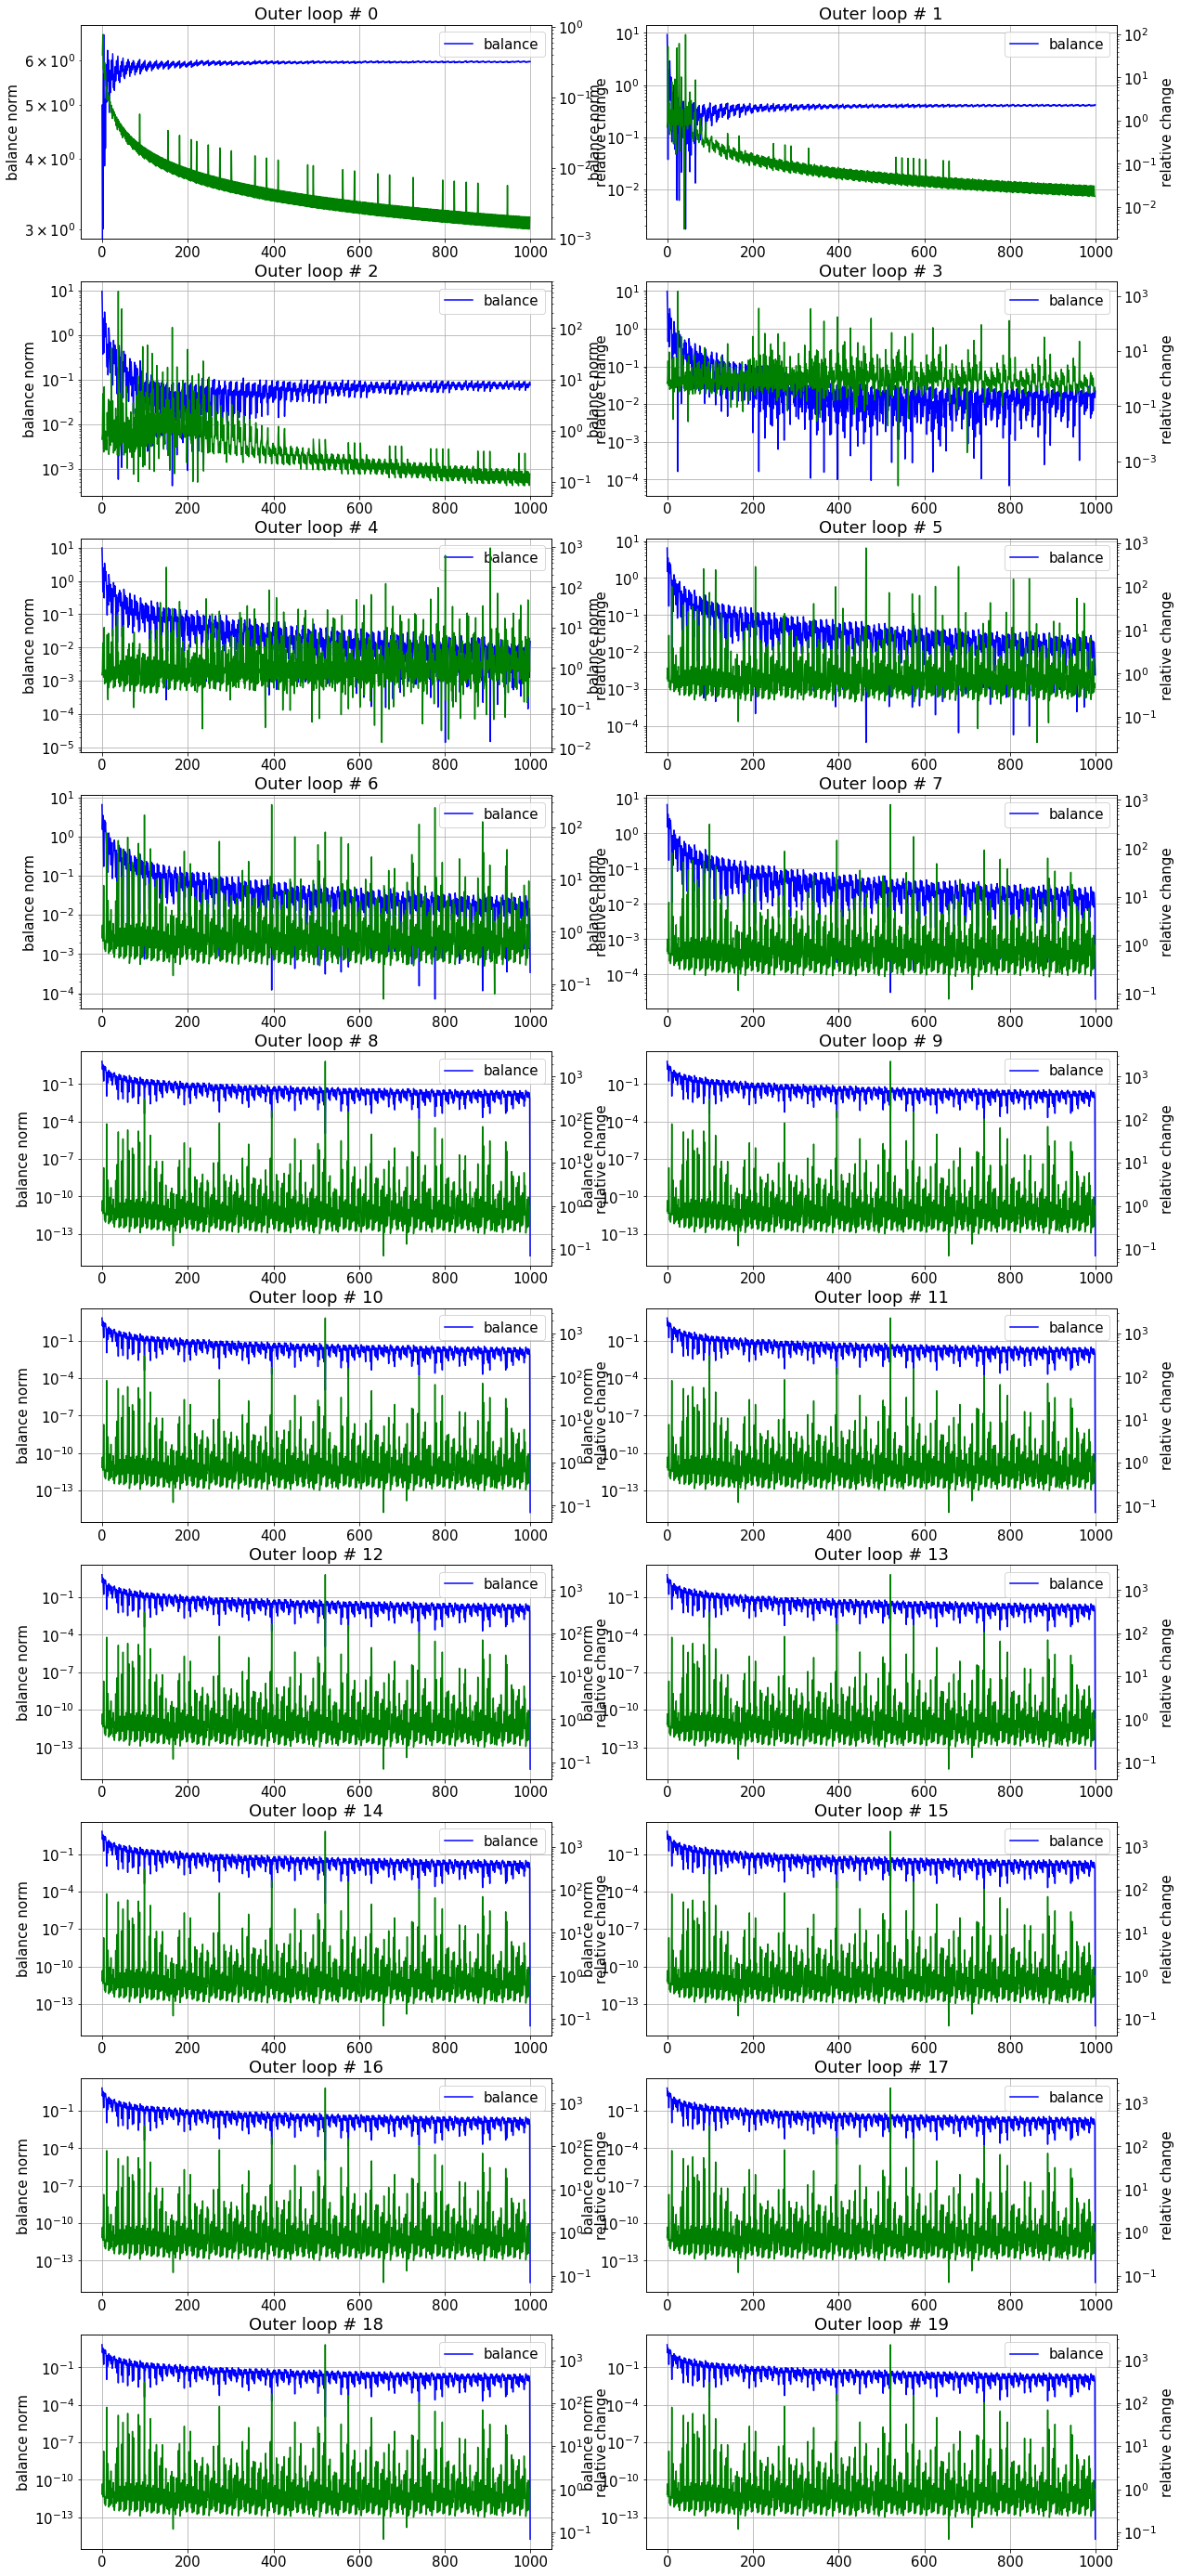

In [377]:
plot_balance_list(balance_list, b_scale='log')

## edge attrs

What do I see? 
- Oscillations at the level of assignments and costs (around the target value, as we expect of course). Those oscillations are directly related to the value of the step size etc.
- I think we understand and expect those oscillations. 

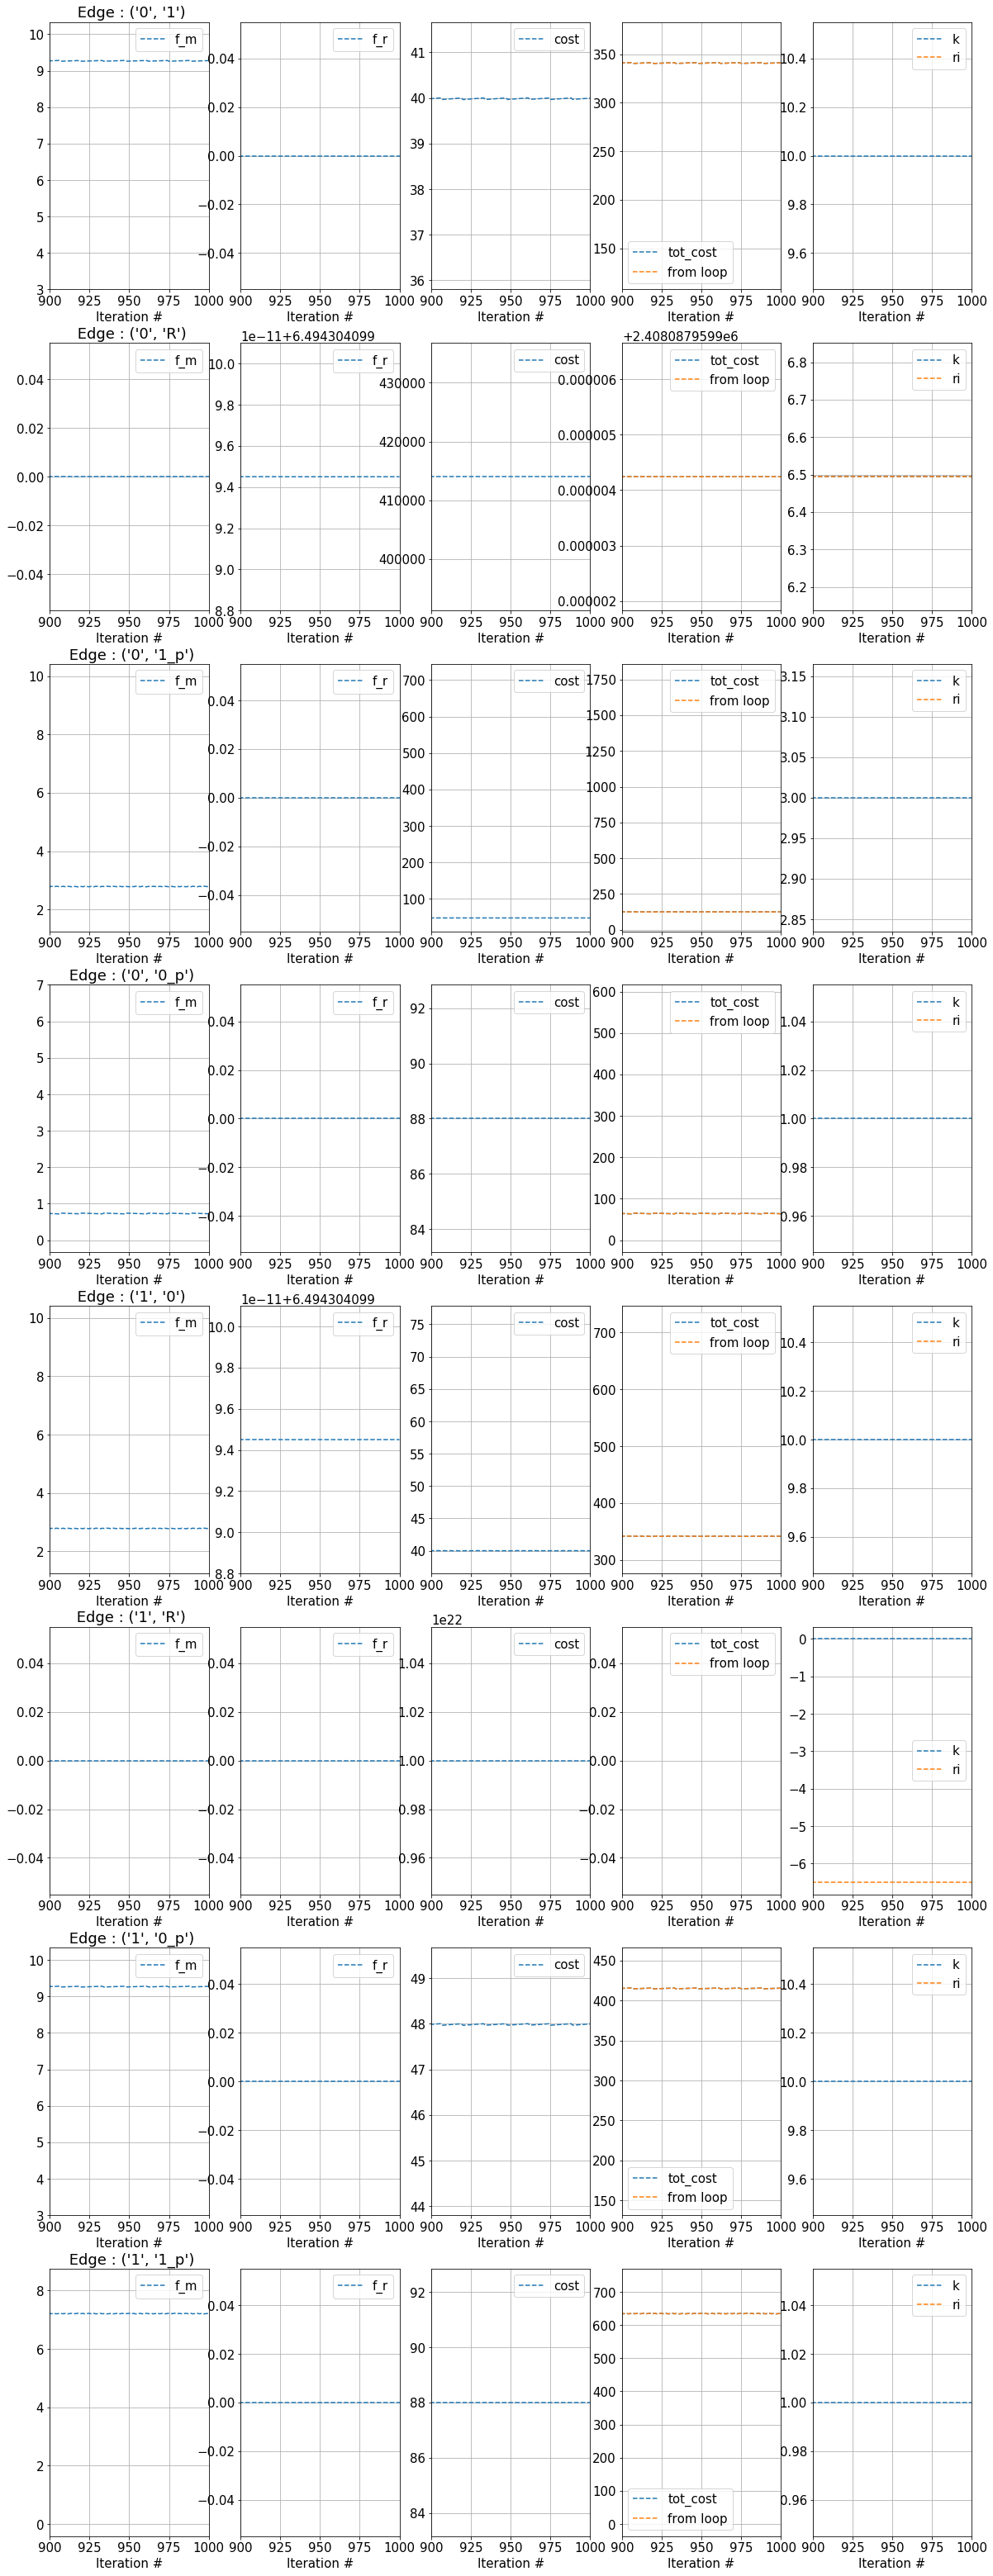

In [378]:
attrs=['f_m', 'f_r','cost','tot_cost','k']
tot_cost, tot_cost_2 = plot_edge_attrs(G_FW[-1],None,attrs,dots=False,lims=[900,1000], ri_=ri_FW[-1], only_R=False)

# No Bumps

Here we run experiments with fixed update. 
Always, the FW_tol is 0 so we go to every inner iteration max number

This is the smallest experiment you can have that would be informative. 

Why is it informative? 
- You have FW = 0, you run with update factor 1.1, and you still do not get the same behavior as before. 
Therefore, the fact of using update factor is not good, or at least has a negative impact and prevents you from converging. 

In [388]:
n_nodes=2
subfolder='no_bumps'

In [389]:
DATA_PATH = '/Users/lucasfuentes/ASL/ICU/notebooks/Data/'

In [390]:
path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/',subfolder)

In [391]:
print(os.listdir(path))

['output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True.pkl']


In [392]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True.pkl


In [393]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': True,
 'ri_smoothing': False,
 'update_factor': 1.1,
 'FW_tol': 0,
 'tol': 0}

## Stop and cost

What do I see? 
- Stopping criterion also decreases to very small values
- Bumps in the are similar to with no bumps. 

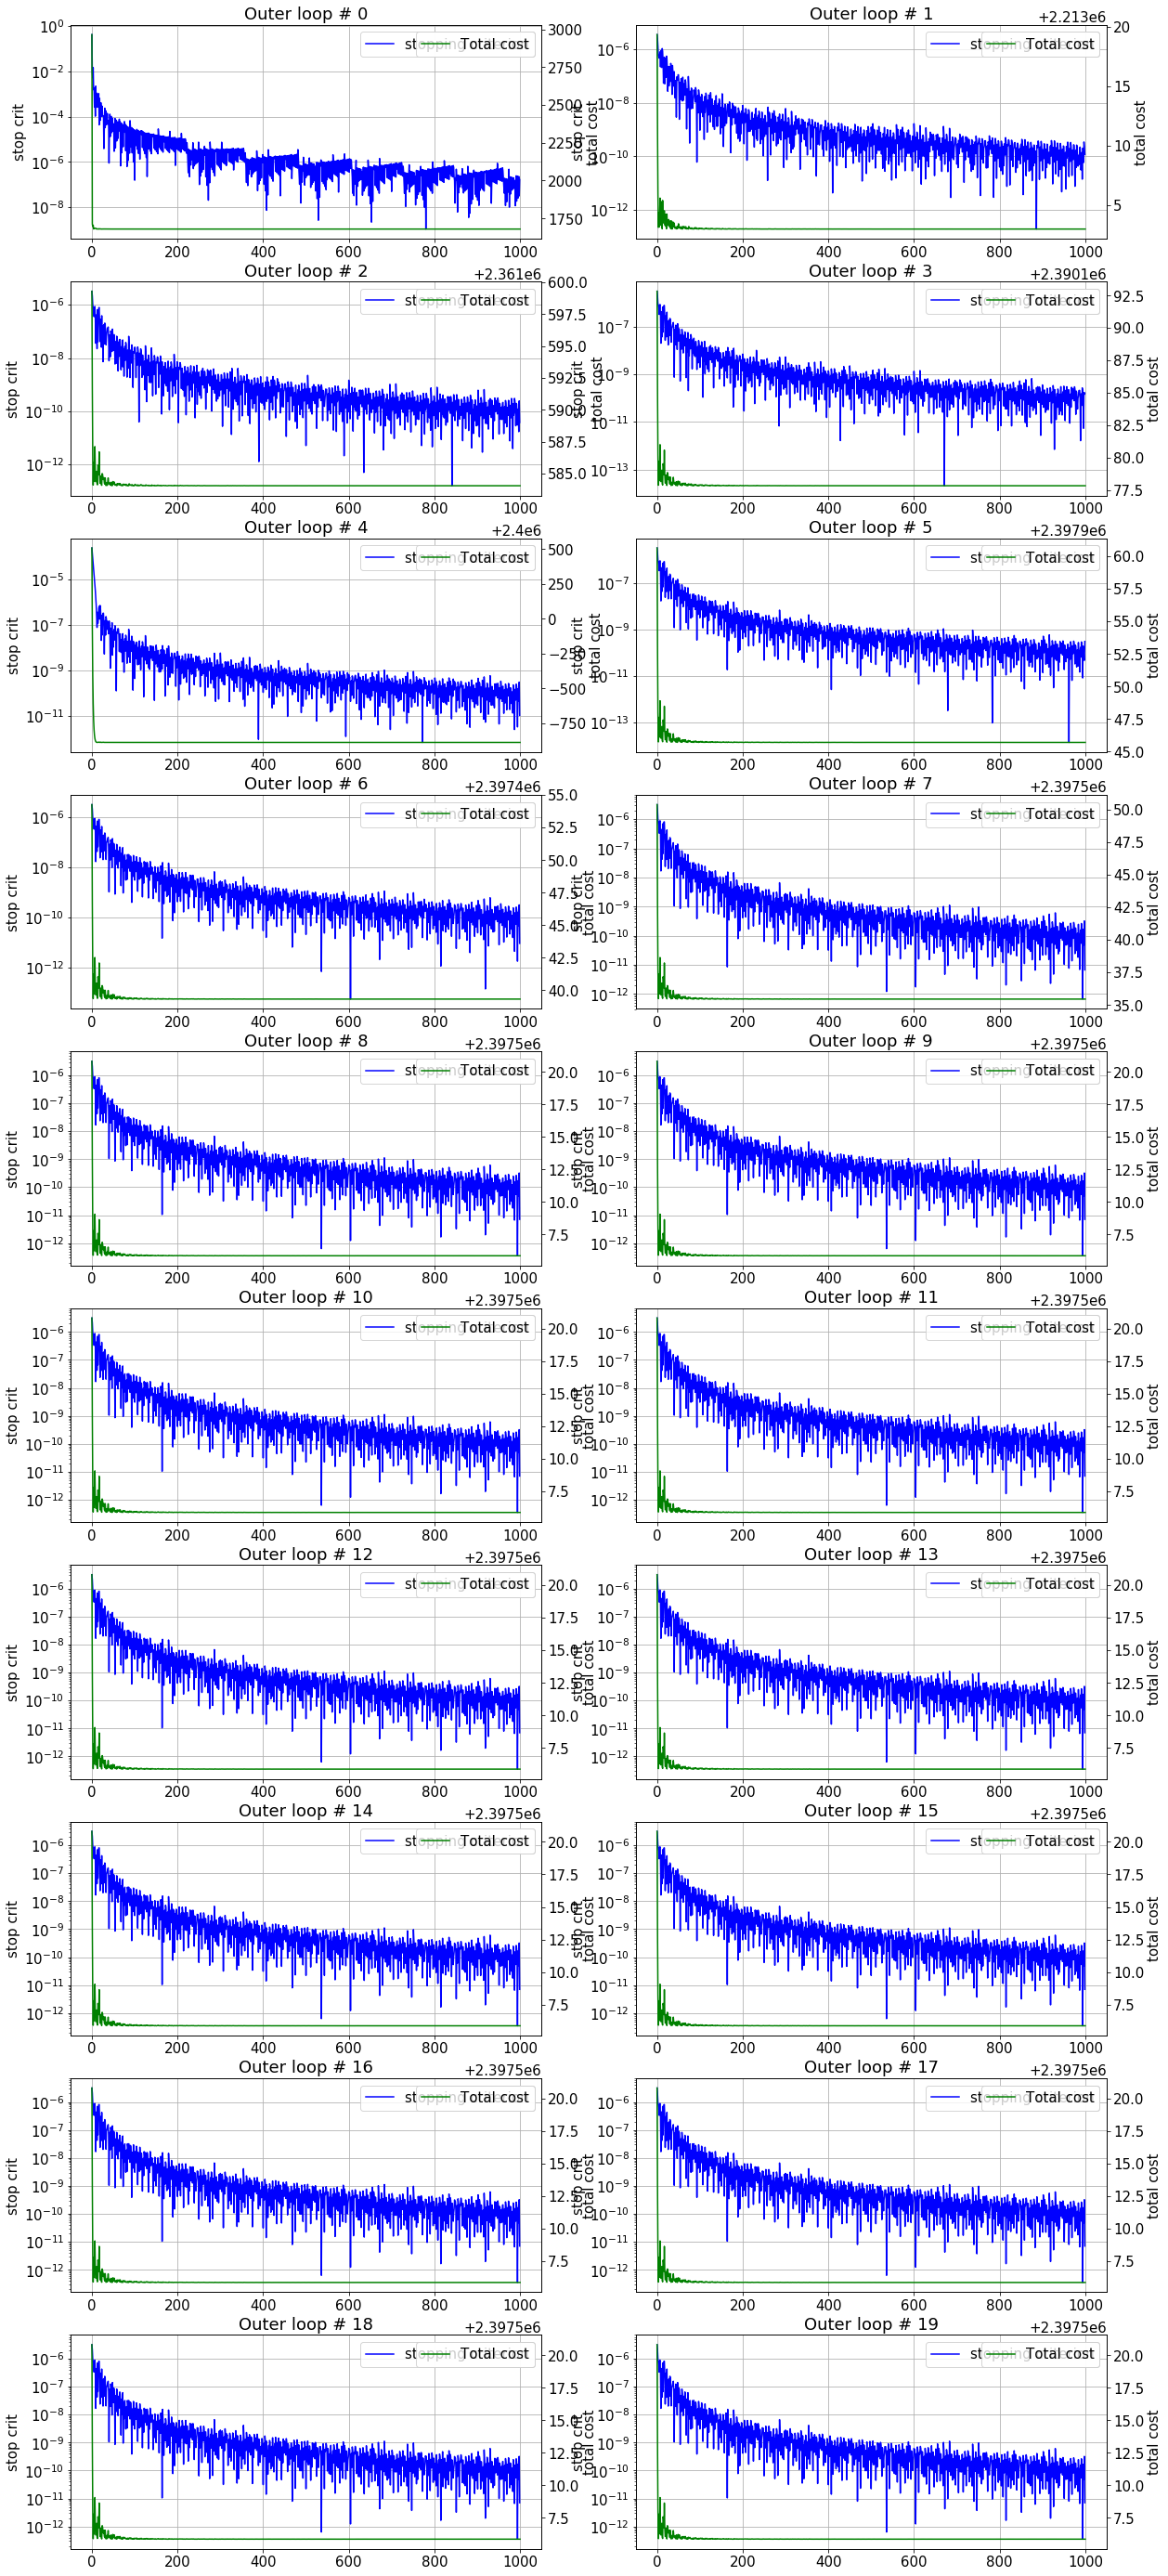

In [394]:
plot_stop_and_cost(opt_res)

## ri

What do I see? 
- ri values seem to stabilize after a few iterations. 

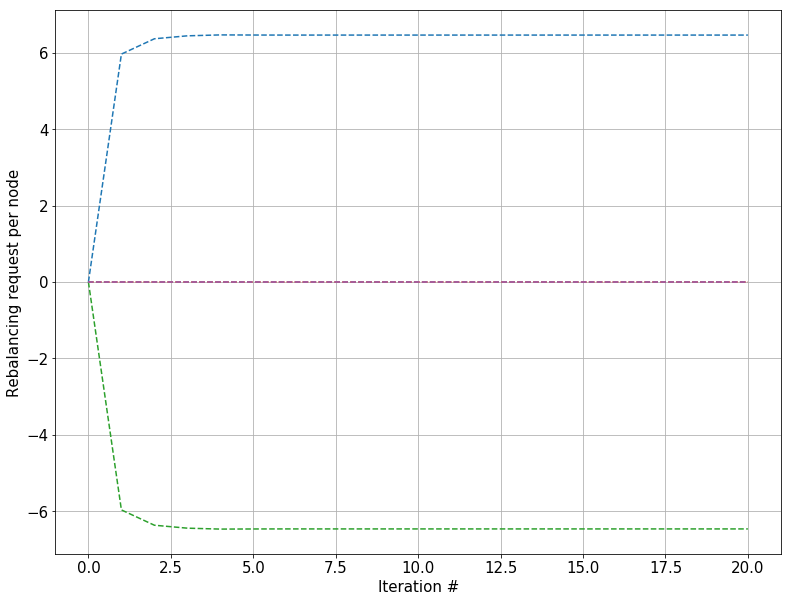

In [395]:
plot_ri_list(ri_FW, save=False, path=None)

## Balance

What do I see? 
- Balance decreases to small values
- But oscillates within an iteration (as we would expect)

Same behavior, interesting. Balance also drops at the end of the iteration. I am assuming this is because we reached a stable point of ri. 

**confirmed:** we indeed see that the ri do not evolve over time (they do not oscillate any more). 

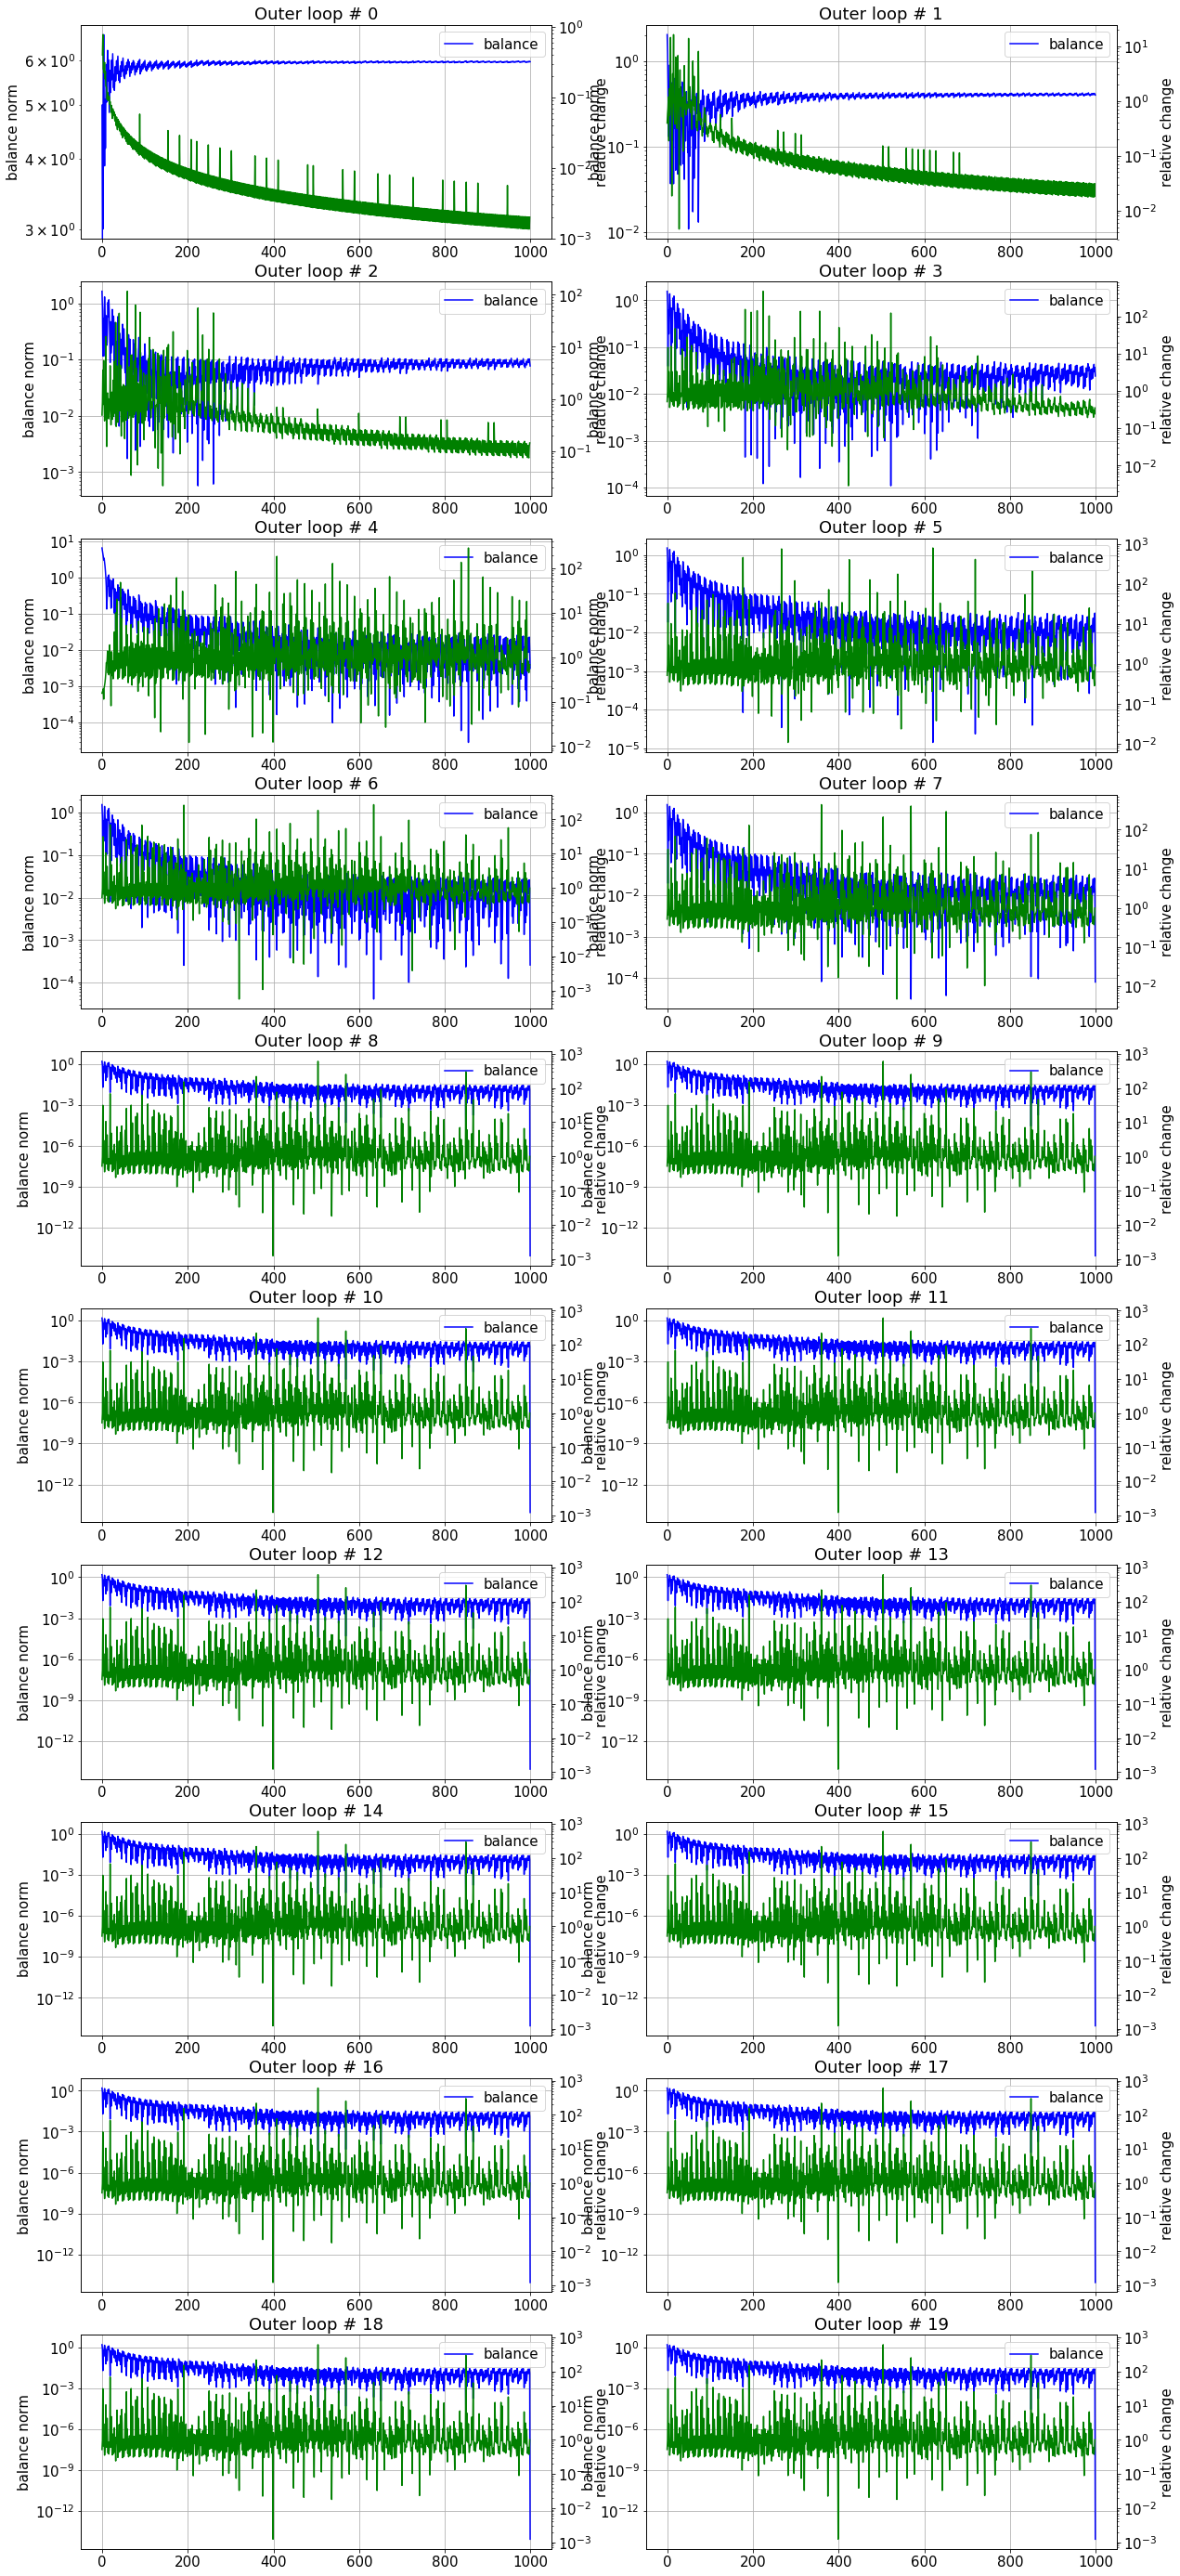

In [396]:
plot_balance_list(balance_list, b_scale='log')

## Edge Attributes

What do I see? 
- Again, similar oscillations as before, quite expectedly. 

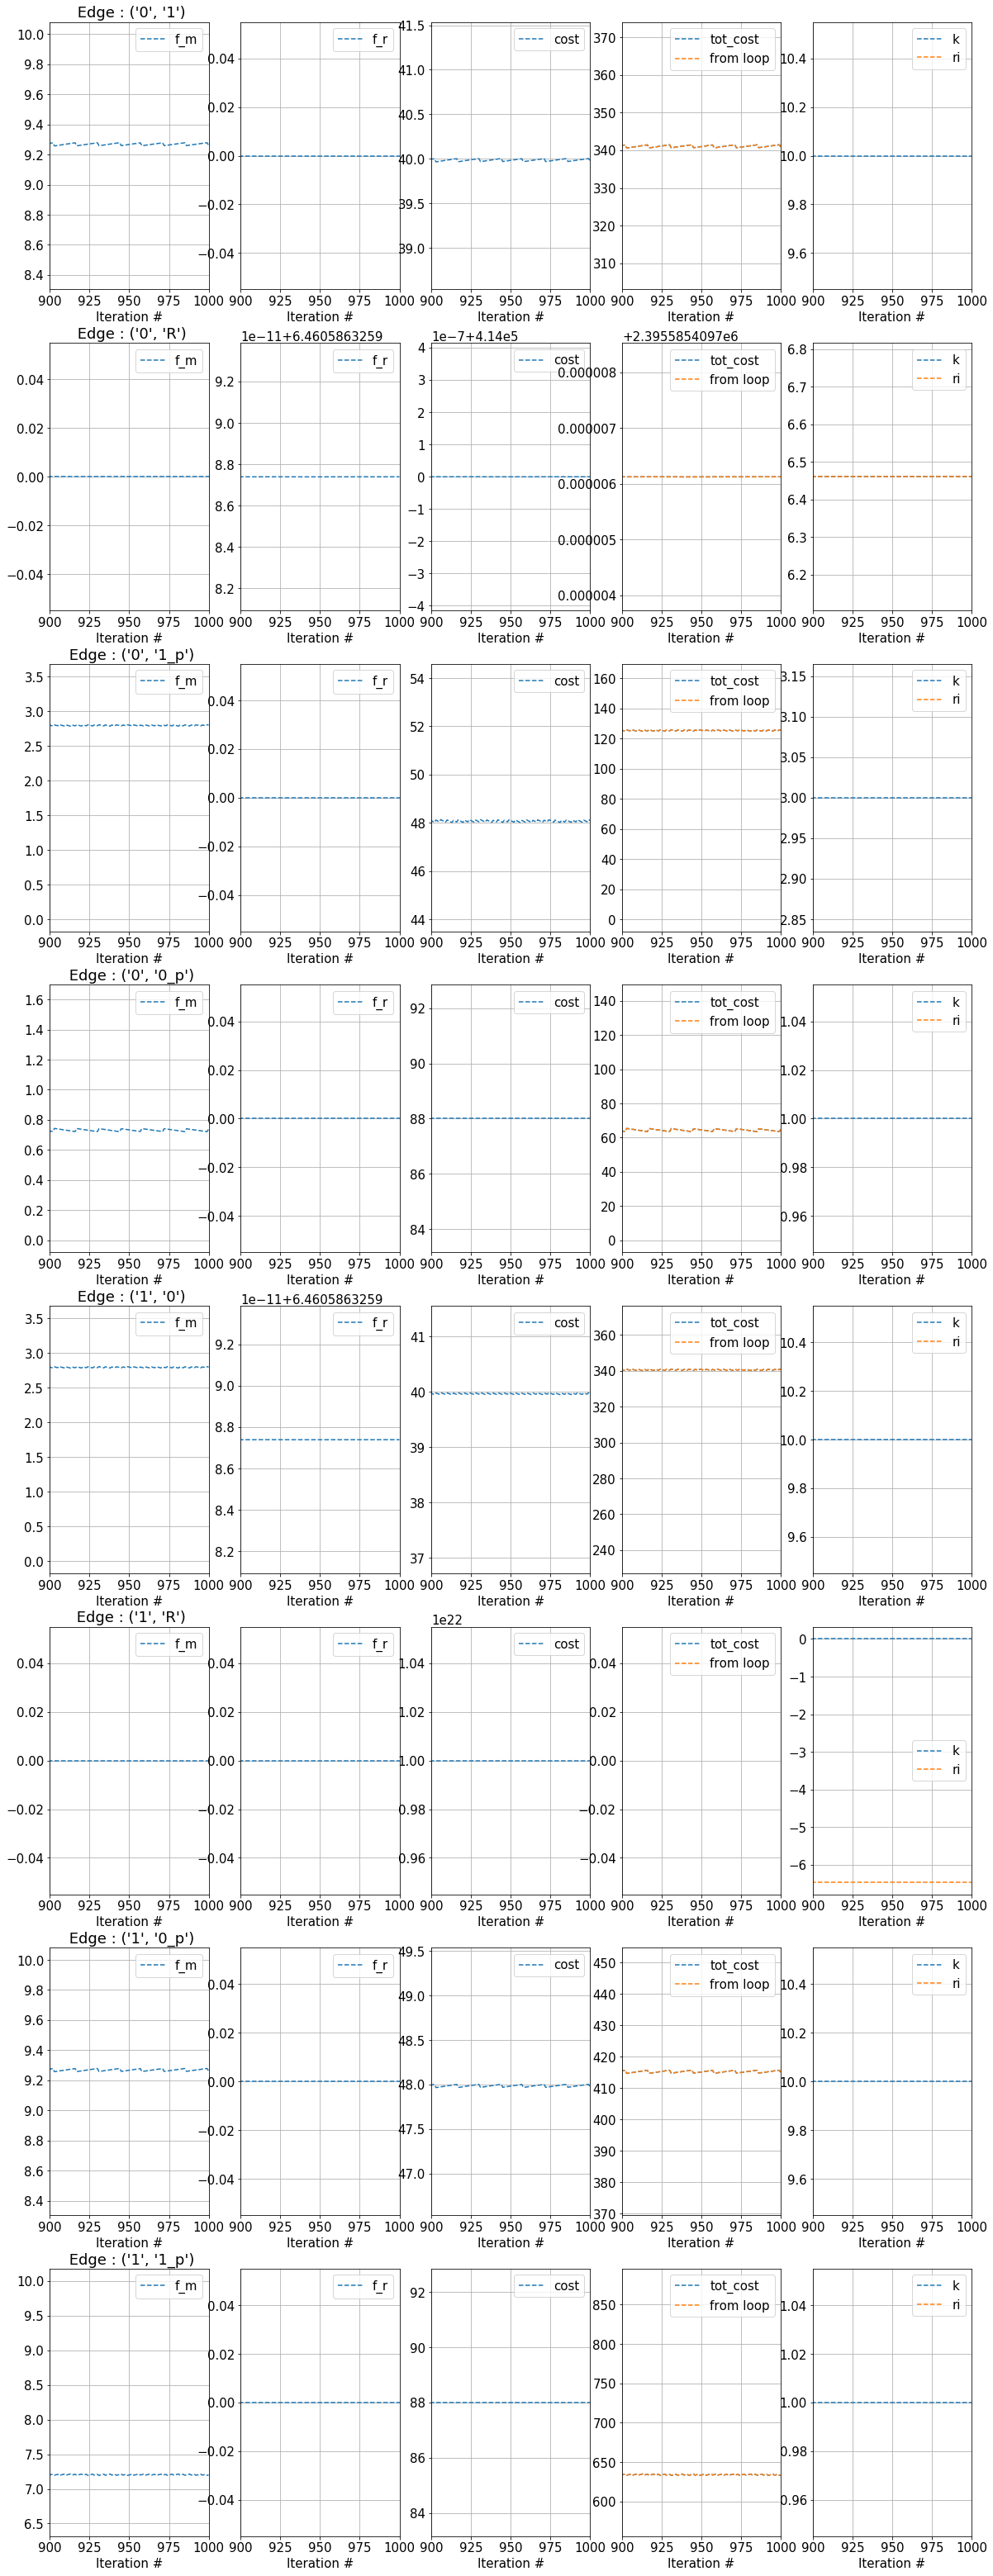

In [397]:
attrs=['f_m', 'f_r','cost','tot_cost','k']
tot_cost, tot_cost_2 = plot_edge_attrs(G_FW[-2],None,attrs,dots=False,lims=[900,1000], ri_=ri_FW[-2], only_R=False)

# Compare balances

In this case we are going to compare the value of the balance at every outer iteration. 

The message here is that actually if you don't look at the artificially solved one perfectly (we assume it is not representative of more complicated systems) then you don't reach absurd levels of accuracy. 

## Using balance vector

By taking the balance vector, which corresponds to an evaluation on the last graph of the inner iteration. 
We see that we reach those very low levels of accuracy. 

Why/how? 
- At some stage, we just solve the same problem every time, with the same initialization (this is the argument that was made when we only had demand flowing from one node to the other)
- Therefore, at iteration k, we reach ridiculous levels of balance norm simply because we match exactly what was given before. 
- However, this is a happy coincidence of the fact of having a very small number of nodes in the network. 

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True.pkl


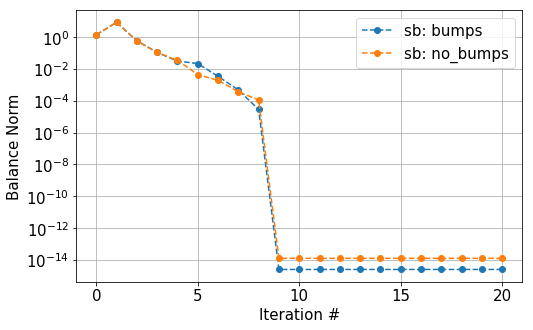

In [398]:
sbfolders = ['bumps', 'no_bumps']

plt.figure(figsize=(8,5))
for sb in sbfolders:
    path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/',sb)
    filename=os.listdir(path)[0]
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    b=np.linalg.norm(balance, axis=1)
    plt.plot(np.array(b), 'o--', label='sb: ' + str(sb))
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')

## Using balance list

By taking the last value in the balance list. 

We see we have exactly the same results as above, as expected. 

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True.pkl


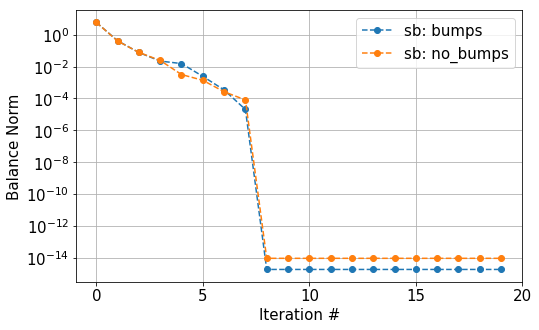

In [401]:
sbfolders = ['bumps', 'no_bumps']

plt.figure(figsize=(8,5))
for sb in sbfolders:
    path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/',sb)
    filename=os.listdir(path)[0]
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    b=[]
    for b_ in balance_list:
        b.append(b_[-1])
    plt.plot(np.array(b), 'o--', label='sb: ' + str(sb))
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')

## Using second to last item in balance list

In this case we take the second to last value of balance in the balance list, which might be more representative of a bigger network (because we won't ever solve exactly the same problem for every node). 

What do we see? 
- We are also stabilized to some values of error (normal because we solve for a given fixed value of ri_k) and actually same argument as above we always pick the same iterate (just not the perfect one)

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_True.pkl


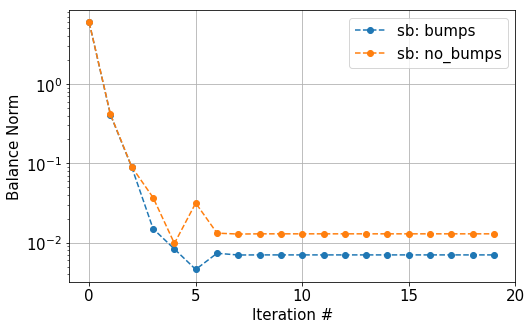

In [402]:
sbfolders = ['bumps', 'no_bumps']

plt.figure(figsize=(8,5))
for sb in sbfolders:
    path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/',sb)
    filename=os.listdir(path)[0]
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    b=[]
    for b_ in balance_list:
        b.append(b_[-2])
    plt.plot(np.array(b), 'o--', label='sb: ' + str(sb))
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')

One of the conclusions of all this is that having oscillations in ri will give you oscillations in balance. While when you stabilize ri, you should stabilize balance. 

# Compare ris

In [411]:
from amod_ed.result_analysis import compare_ri

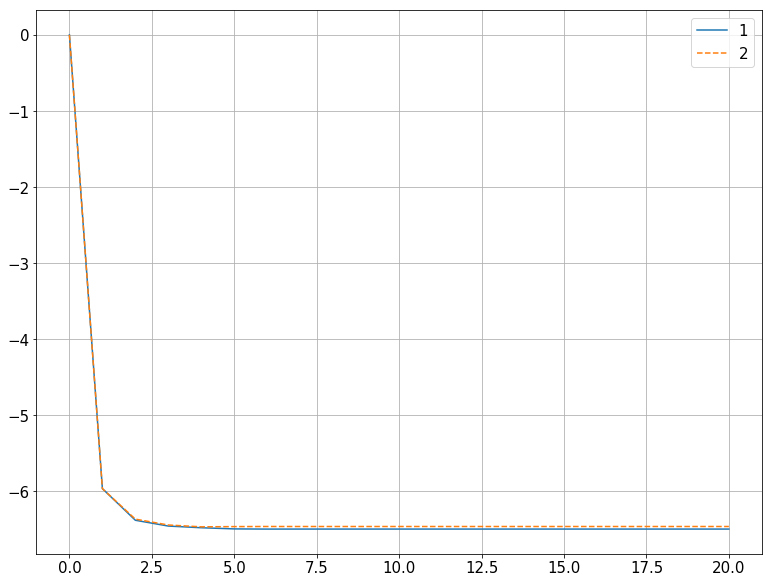

In [412]:
compare_ri(ri1, ri_FW, '1')

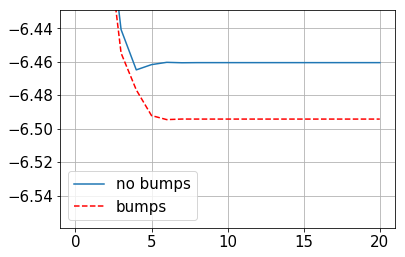

In [413]:
rr1=[]
rr = []

for r in ri_FW:
    rr.append(r['1'])
for r in ri1:
    rr1.append(r['1'])
plt.figure()
plt.plot(rr, label="no bumps")
plt.ylim([1.01*np.mean(rr1[-5:]), 0.99*np.mean(rr1[-5:])])
plt.plot(rr1, 'r--', label="bumps")
plt.grid()
plt.legend()

In [409]:
rr1

[0,
 -5.963058897190618,
 -6.378631348691216,
 -6.454862502766681,
 -6.476876416996163,
 -6.492210384425938,
 -6.494623141329715,
 -6.494284158954802,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502,
 -6.494304099094502]

In [410]:
rr

[0,
 -5.963058897190618,
 -6.3637202251044425,
 -6.440825647544082,
 -6.464913336302426,
 -6.4617723652311305,
 -6.460406864730088,
 -6.460666086546196,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398,
 -6.460586325987398]

Both are indeed stabilized but to different values

This is something we have noticed long ago. We have tried a bunch of techniques to resolve this
- Evolving bounds
- Different types of ri_smoothing

But so far, we have not had much much success. 



## As a function of different update factors

The hypothesis currenlty is that the update factor actually creates/generates those bumps. However, we currently do not know why... 

u_f_4.pkl
2.0
u_f_2.pkl
1.1
u_f_3.pkl
1.5
u_f_1.pkl
1.0


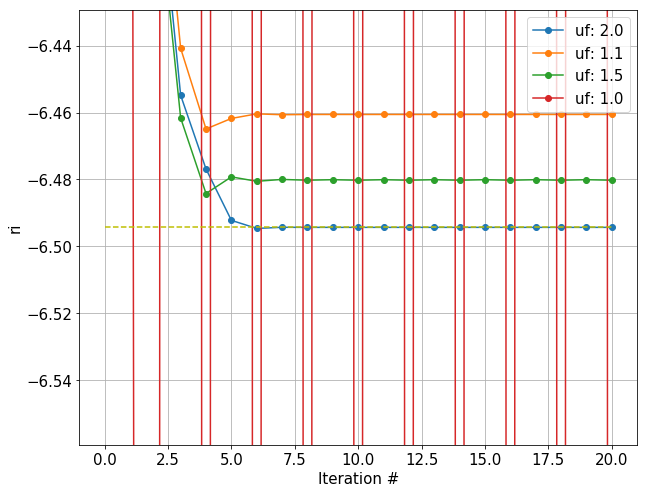

In [417]:
path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/','update_factor')
plt.figure(figsize=(10,8))
for filename in os.listdir(path):
    if not filename.endswith(".pkl"):
        continue
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    print(params['update_factor'])

    rr=[]
    for r in ri_FW:
        rr.append(r['1'])
    plt.plot(np.array(rr), 'o-', label='uf: ' + str(params['update_factor']))
    plt.grid(True)
    plt.legend()
    if params['update_factor']==2.0:
        plt.ylim([1.01*np.mean(rr[-5:]), 0.99*np.mean(rr[-5:])])
plt.xlabel('Iteration #')
plt.ylabel('ri')
x=np.linspace(0,20)
plt.plot(x, ri1[-1]['1']*np.ones(x.shape), 'y--')

What we see is that the update factor influences how "accurate" an answer you can actually have. 

Therefore, is it like a hyperparameter you have to tune or is it just something you simply **cannot/are not allowed to** do? 

# Compare balance as a function of different update factors

u_f_4.pkl
2.0
u_f_2.pkl
1.1
u_f_3.pkl
1.5
u_f_1.pkl
1.0


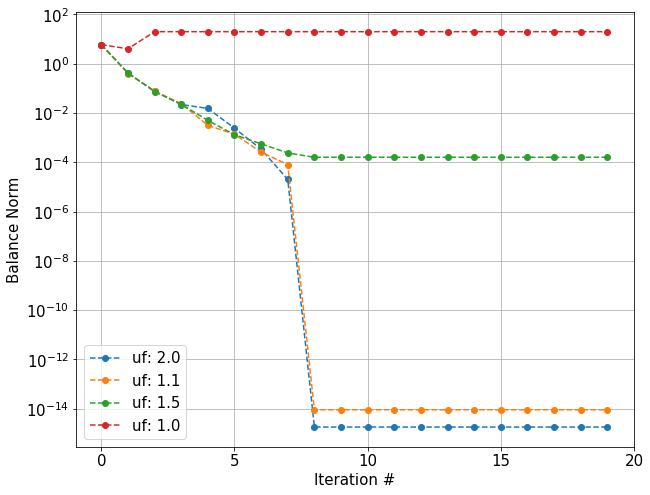

In [418]:
path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/','update_factor')
plt.figure(figsize=(10,8))
for filename in os.listdir(path):
    if not filename.endswith(".pkl"):
        continue
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    print(params['update_factor'])
    b=[]
    for b_ in balance_list:
        b.append(b_[-1])
    plt.plot(np.array(b), 'o--', label='uf: ' + str(params['update_factor']))
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')

What we see is that the uf does impact the balance in the last iteration, but the uf = 1.5 here does not really behave as I would have expected... 

## Using the second to last entry

u_f_4.pkl
2.0
u_f_2.pkl
1.1
u_f_3.pkl
1.5
u_f_1.pkl
1.0


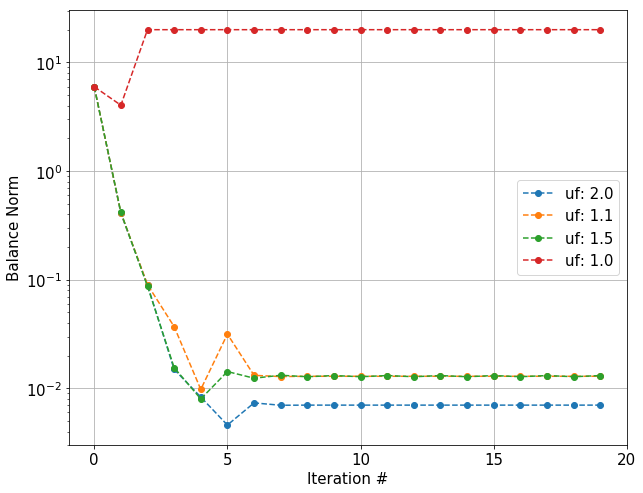

In [419]:
path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/','update_factor')
plt.figure(figsize=(10,8))
for filename in os.listdir(path):
    if not filename.endswith(".pkl"):
        continue
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
    print(params['update_factor'])
    b=[]
    for b_ in balance_list:
        b.append(b_[-2])
    plt.plot(np.array(b), 'o--', label='uf: ' + str(params['update_factor']))
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xticks(np.arange(0, 21, step=5))
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')

What do I see? 
- using the second to last entry, we are again limited to a given value of the balance and the uf = 2 still outperforms the others. 

But, on the other hand, we do solve the problem perfectly so it is a bit "unfair" to use this as a representative value. 

## Why does the uf = 1.5 not reach a small value of balance (but still not ridiculous)

1.5


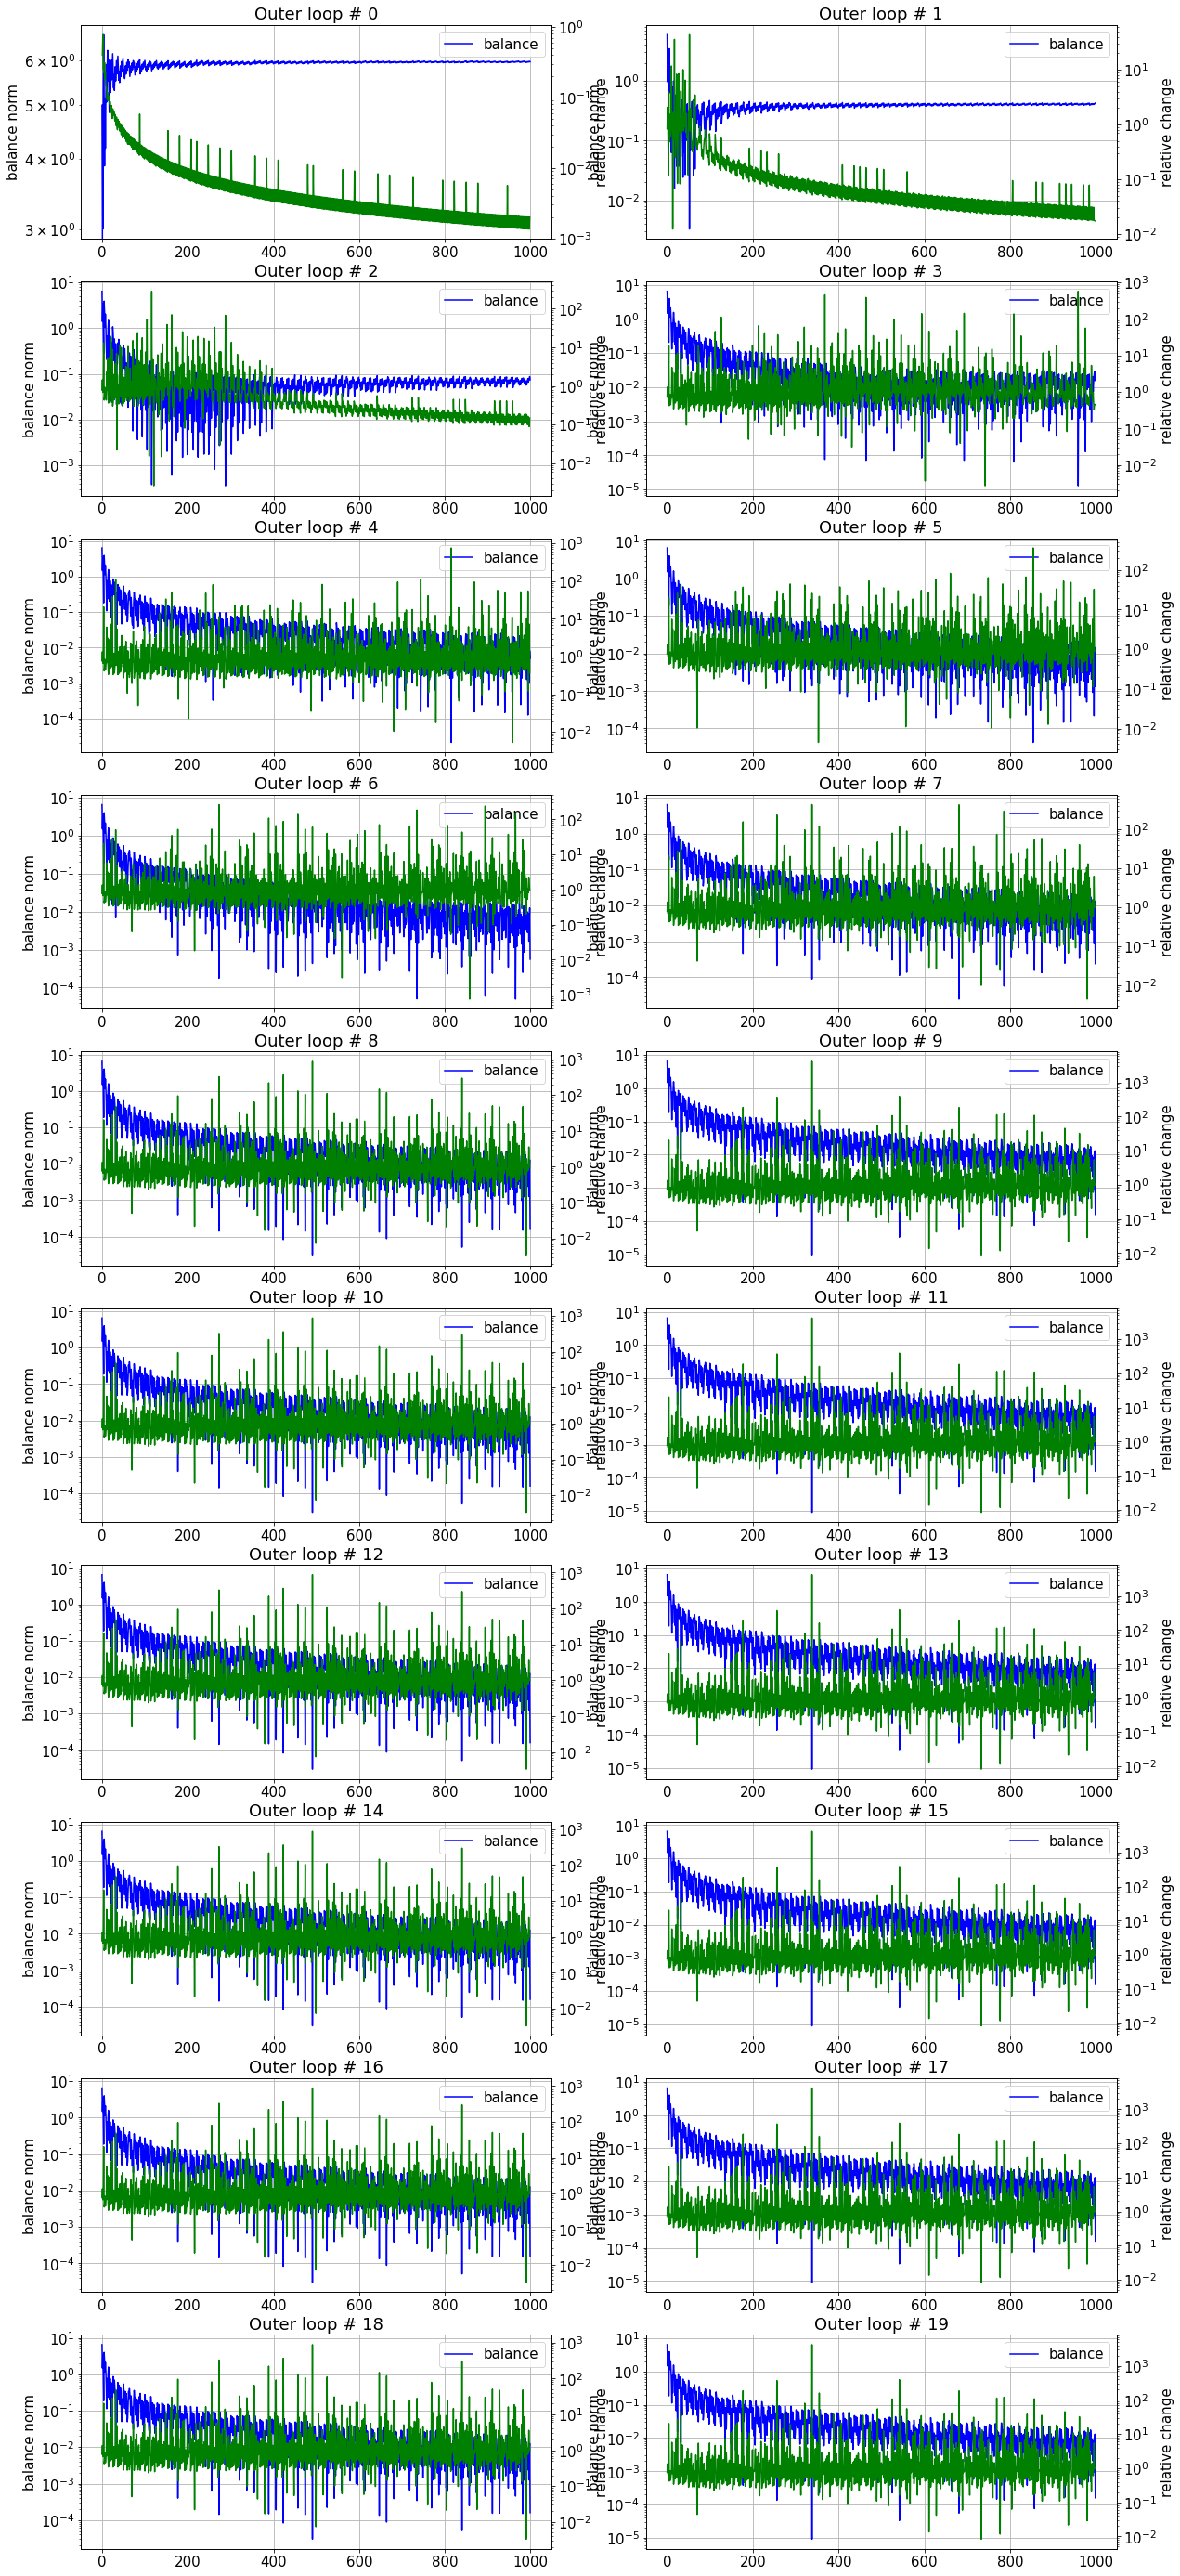

In [420]:
path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes_back2basics/outputs/','update_factor')



with open(os.path.join(path, 'u_f_3.pkl'), 'rb') as f:
    G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)
print(params['update_factor'])
plot_balance_list(balance_list, b_scale='log')

In [421]:
rr = []

for r in ri_FW:
    rr.append(r['1'])

In [422]:
rr

[0,
 -5.963058897190618,
 -6.387604411556512,
 -6.461642150264908,
 -6.484194448266306,
 -6.479229353480854,
 -6.480545402701094,
 -6.479987078789474,
 -6.480226360465885,
 -6.480066839348279,
 -6.480226360465885,
 -6.480066839348279,
 -6.480226360465885,
 -6.480066839348279,
 -6.480226360465885,
 -6.480066839348279,
 -6.480226360465885,
 -6.480066839348279,
 -6.480226360465885,
 -6.480066839348279,
 -6.480226360465885]